### Importing Libraries

In [1]:
import os
import string
import csv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/varunchopra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/varunchopra/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/varunchopra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<h3>Reading the input from lyrics file.</h3>

In [3]:
stop_words = (stopwords.words('english'))
newsw=['youve','youd','youll','shes','ive','hes','cant','never','dont','one','didnt']
stop_words.extend(newsw)

songCount = dict()
wordCount = dict()

header = ['word', 'frequency', 'genre']

with open(f'Documents/genres2/freqDict.csv', 'w', newline = "") as file:
    writer = csv.writer(file)
    writer.writerow(header)

# a list of all the present genres
# genresList = ['blues_lyrics', 'country_lyrics', 'disco_lyrics', 'hiphop_lyrics', 'metal_lyrics', 'pop_lyrics', 'reggae_lyrics', 'rock_lyrics']
genresList = ['blues_lyrics', 'disco_lyrics', 'hiphop_lyrics', 'pop_lyrics', 'reggae_lyrics']

# iterating over the list of all the genres in the genreList
for genreName in genresList:
    
    songCount[genreName.replace('_lyrics','')] = 0
    
    genreLyrics = ''
    lyricStopped = list()
    
    # getting the path of the current genre
    genre = os.listdir(f'Documents/genres2/{genreName}')
    
    # selecting each song from each genre
    for song in genre:
        path = f'Documents/genres2/{genreName}/{song}'
        
        if song == '.DS_Store':
            continue
            
        # counting songs per genre    
        songCount[genreName.replace('_lyrics','')] += 1
        
        # defining the path of a song lyrics file
        songname = open(path, 'r')
        
        # read all the words in lower case
        lyric = songname.read().lower()
        
        # removing punctuations
        for punct in string.punctuation:
            lyric = lyric.replace(punct, '')
        
        # adding lyrics to genreLyrics list
        genreLyrics += lyric
    
    # extracting words from a particular genreLyrics
    words = genreLyrics.split()
    
    # counting words per genre
    wordCount[genreName.replace('_lyrics','')] = len(words)
    
    # removing numbers
    words = [x for x in words if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]
    
    # lemmatized words
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(x) for x in words]
    
    # removing the stopwords
    for l in words:
        if l not in stop_words:
            lyricStopped.append(l)
            
    # stemming
    porter = PorterStemmer()
    lyricStopped = [porter.stem(word) for word in lyricStopped]
    
    # frequency dictionary
    freqDict = {}
    
    # counting the occurence of all the words in the dictionary
    # no need to make a set of UNIQUE WORDS as the "keys" of this dictionary will all be unique
    for word in lyricStopped:
        freqDict[word] = freqDict.get(word, 0) + 1
    # print the dictionary
    with open(f'Documents/genres2/freqDict.csv', 'a', newline = "") as file:
        writer = csv.writer(file)
        for key, value in freqDict.items():
            writer.writerow([key, value, genreName.replace('_lyrics','')])
            
    
            
print(songCount)
print(wordCount)


{'blues': 56, 'disco': 85, 'hiphop': 93, 'pop': 58, 'reggae': 85}
{'blues': 10001, 'disco': 23073, 'hiphop': 47914, 'pop': 18786, 'reggae': 22948}


In [4]:
dataset = pd.read_csv('Documents/genres2/freqDict.csv')
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

print(X)

[['true' 8]
 ['love' 83]
 ['goneha' 2]
 ...
 ['seat' 2]
 ['commot' 4]
 ['wind' 2]]


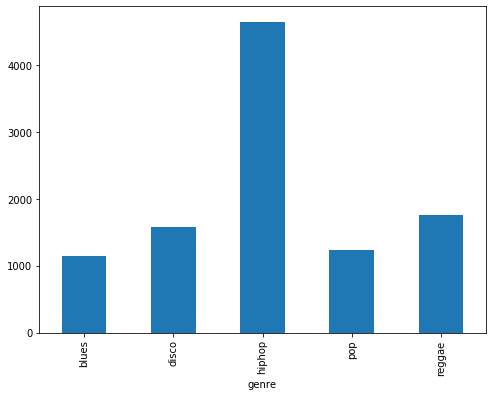

In [5]:
fig = plt.figure(figsize=(8,6))
dataset.groupby('genre').frequency.count().plot.bar(ylim=0)
plt.show()

In [6]:
word=X[:,0]
frequency=X[:,1]
frequency= np.reshape(frequency,(-1,1))
frequency.shape

(10353, 1)

In [7]:
le = preprocessing.LabelEncoder()
word_encoded=le.fit_transform(word.astype(str))
word_encoded = np.reshape(word_encoded,(-1,1))
word_encoded.shape

(10353, 1)

In [8]:
features = np.column_stack((word_encoded,frequency))
features.shape

(10353, 2)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 15)

In [10]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0 240   0   0]
 [  0  11 318   1   0]
 [  0   9 925   6   0]
 [  0   6 226   0   0]
 [  0   4 323   2   0]]


In [13]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4519555770159343


In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# SVM

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[  0   0 240   0   0]
 [  0   0 330   0   0]
 [  0   0 940   0   0]
 [  0   0 232   0   0]
 [  0   0 329   0   0]]
Accuracy: 0.45388701110574603


In [16]:
# K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[ 29  31 142  14  24]
 [ 34  57 196  14  29]
 [ 93 124 584  50  89]
 [ 26  37 124  23  22]
 [ 36  48 199  23  23]]
Accuracy: 0.34572670207629164


In [17]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[ 27  41 106  26  40]
 [ 44  49 155  35  47]
 [103 136 423 112 166]
 [ 24  39  99  35  35]
 [ 42  48 145  40  54]]
Accuracy: 0.2839208112023177


In [18]:
# NN

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[  0   0 238   0   2]
 [  0   0 327   1   2]
 [  0   0 928   2  10]
 [  0   0 228   0   4]
 [  0   0 323   1   5]]
Accuracy: 0.4505070014485756


In [19]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.4519555770159343


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [20]:
# # NN?

# from keras.models import Sequential
# from keras import layers

# input_dim = X_train.shape[1]  # Number of features

# model = Sequential()
# model.add(layers.Dense(512, input_dim=input_dim, activation='relu'))

# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# encoder = LabelEncoder()

# # y_train = encoder.fit_transform(y_train)
# # y_test = encoder.fit_transform(y_test)
# y_enc = encoder.fit_transform(y)

# X_train, X_test, y_train, y_test = train_test_split(features, y_enc, test_size = 0.2, random_state = 15)

# history = model.fit(X_train, y_train, epochs=20, batch_size=256)

# # loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# # print("Training Accuracy: {:.4f}".format(accuracy))
# # loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# # print("Testing Accuracy:  {:.4f}".format(accuracy))

# # calculate accuracy
# test_loss, test_acc = model.evaluate(X_test,y_test)
# print('test_acc: ',test_acc)

Using TensorFlow backend.


Epoch 1/20
8282/8282 [==============================] - 0s 30us/step - loss: -8804.1575 - accuracy: 0.1502
Epoch 2/20
8282/8282 [==============================] - 0s 13us/step - loss: -62592.8853 - accuracy: 0.1502
Epoch 3/20
8282/8282 [==============================] - 0s 13us/step - loss: -245020.6853 - accuracy: 0.1502
Epoch 4/20
8282/8282 [==============================] - 0s 12us/step - loss: -689337.1908 - accuracy: 0.1502
Epoch 5/20
8282/8282 [==============================] - 0s 11us/step - loss: -1571446.6360 - accuracy: 0.1502
Epoch 6/20
8282/8282 [==============================] - 0s 12us/step - loss: -3066220.3778 - accuracy: 0.1502
Epoch 7/20
8282/8282 [==============================] - 0s 12us/step - loss: -5412076.3200 - accuracy: 0.1502
Epoch 8/20
8282/8282 [==============================] - 0s 11us/step - loss: -8782652.3330 - accuracy: 0.1502
Epoch 9/20
8282/8282 [==============================] - 0s 11us/step - loss: -13393881.5112 - accuracy: 0.1502
Epoch 10/20
8282

In [29]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='sigmoid'))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
              
history = model.fit(X_train,y_train,epochs=20,batch_size=64)

# calculate accuracy
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

Epoch 1/20
8282/8282 [==============================] - 0s 36us/step - loss: 1.5763 - accuracy: 0.4131
Epoch 2/20
8282/8282 [==============================] - 0s 19us/step - loss: 1.4469 - accuracy: 0.4466
Epoch 3/20
8282/8282 [==============================] - 0s 19us/step - loss: 1.4423 - accuracy: 0.4474
Epoch 4/20
8282/8282 [==============================] - 0s 18us/step - loss: 1.4402 - accuracy: 0.4463
Epoch 5/20
8282/8282 [==============================] - 0s 18us/step - loss: 1.4392 - accuracy: 0.4472
Epoch 6/20
8282/8282 [==============================] - 0s 20us/step - loss: 1.4386 - accuracy: 0.4475
Epoch 7/20
8282/8282 [==============================] - 0s 19us/step - loss: 1.4382 - accuracy: 0.4469
Epoch 8/20
8282/8282 [==============================] - 0s 19us/step - loss: 1.4401 - accuracy: 0.4460
Epoch 9/20
8282/8282 [==============================] - 0s 19us/step - loss: 1.4395 - accuracy: 0.4476
Epoch 10/20
8282/8282 [==============================] - 0s 20us/step - l